## Imports + Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = "../data/synthetic_kpi.csv"

df = pd.read_csv(DATA_PATH, parse_dates=["date"])
df = df.sort_values("date").reset_index(drop=True)

df.head()

2026-01-31 22:24:31.271 system_profiler[10725:646341] CoreText note: Client requested name ".AlBayanPUA", it will get Times-Roman rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2026-01-31 22:24:31.271 system_profiler[10725:646341] CoreText note: Set a breakpoint on CTFontLogSystemFontNameRequest to debug.
2026-01-31 22:24:31.280 system_profiler[10725:646341] CoreText note: Client requested name ".AlBayanPUA-Bold", it will get Times-Roman rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2026-01-31 22:24:31.288 system_profiler[10725:646341] CoreText note: Client requested name ".AlNilePUA", it will get Times-Roman rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].

,date,kpi_value,promo_index,baseline_trend,seasonality,is_anomaly
0,2016-01-01,46.780252,0.000000,50.00000,-5.206605,0
1,2016-01-02,51.350021,13.572203,50.03001,-11.699135,0
2,2016-01-03,43.268796,0.000000,50.06002,-9.381978,0
3,2016-01-04,73.778452,17.596302,50.09003,0.000000,0
4,2016-01-05,58.565404,0.000000,50.12004,9.381978,0


## Basic Checks

In [2]:
print("Rows:", len(df))
print("Date range:", df["date"].min(), "→", df["date"].max())
df.isna().sum()

Rows: 3000
Date range: 2016-01-01 00:00:00 → 2024-03-18 00:00:00


date              0
kpi_value         0
promo_index       0
baseline_trend    0
seasonality       0
is_anomaly        0
dtype: int64

## KPI Overview

In [3]:
df["kpi_value"].describe()

count    3000.000000
mean       96.597934
std        28.139253
min        33.889712
25%        73.860295
50%        96.639166
75%       119.110817
max       188.867979
Name: kpi_value, dtype: float64

## Plot KPI series

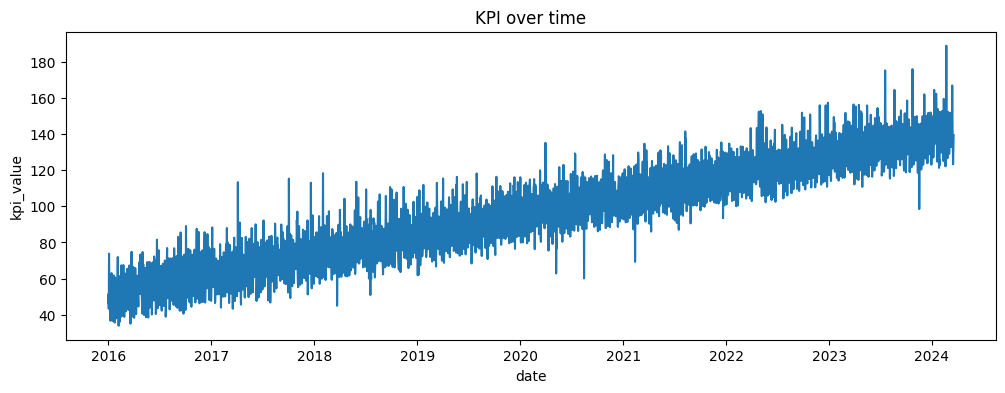

In [4]:
plt.figure(figsize=(12,4))
plt.plot(df["date"], df["kpi_value"])
plt.title("KPI over time")
plt.xlabel("date")
plt.ylabel("kpi_value")
plt.show()

## Seasonality view (day-of-week)

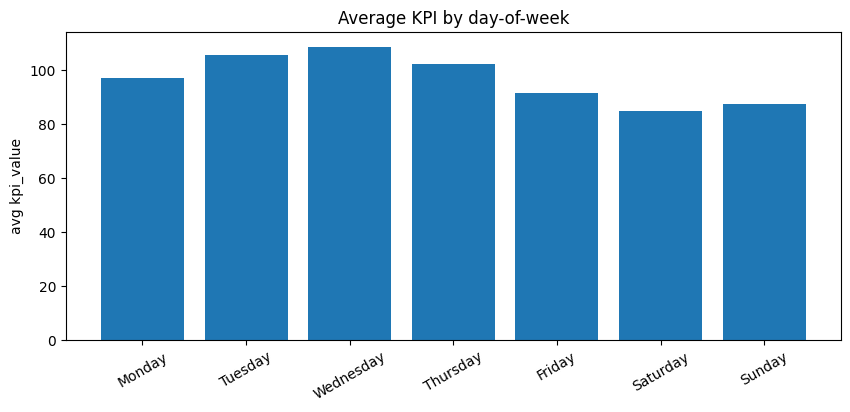

In [5]:
df["dow"] = df["date"].dt.day_name()
dow_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
agg = df.groupby("dow")["kpi_value"].mean().reindex(dow_order)

plt.figure(figsize=(10,4))
plt.bar(agg.index, agg.values)
plt.title("Average KPI by day-of-week")
plt.xticks(rotation=30)
plt.ylabel("avg kpi_value")
plt.show()

## Promo effect quick check

In [6]:
promo_agg = df.groupby(df["promo_index"] > 0)["kpi_value"].mean()
promo_agg.index = ["no_promo", "promo"]
promo_agg

no_promo     95.092517
promo       110.247726
Name: kpi_value, dtype: float64

## Anomaly distribution + highlight anomalies on plot (if label exists)

is_anomaly
0    2970
1      30
Name: count, dtype: int64


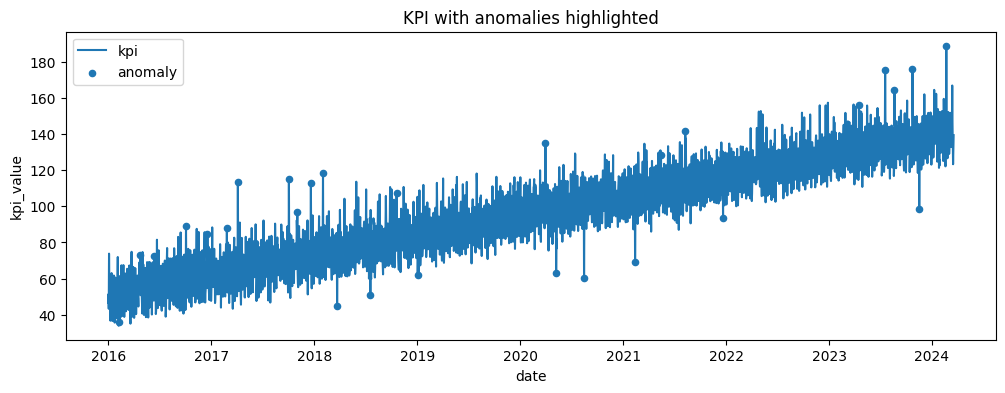

In [7]:
if "is_anomaly" in df.columns:
    print(df["is_anomaly"].value_counts(dropna=False))
    plt.figure(figsize=(12,4))
    plt.plot(df["date"], df["kpi_value"], label="kpi")
    anom = df[df["is_anomaly"] == 1]
    plt.scatter(anom["date"], anom["kpi_value"], s=20, label="anomaly")
    plt.title("KPI with anomalies highlighted")
    plt.xlabel("date")
    plt.ylabel("kpi_value")
    plt.legend()
    plt.show()
else:
    print("No is_anomaly column present.")